<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_NN_Classifier_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

# Load Data & Pre-Process

In [9]:
X,y = make_moons( n_samples=100, noise=0.25, random_state=3)        # Create dummy dataset with two classes distributed in the shape of crescent moon
X_train, X_test, y_train, y_test = split(X,y, random_state=4, stratify=y)

In [3]:
def plot_boundary(classifier, X, ax):    
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Train Model

*** nodes: 10, alpha: 0.0001 ***
*** nodes: 10, alpha: 0.01 ***
*** nodes: 10, alpha: 0.1 ***
*** nodes: 10, alpha: 1 ***
*** nodes: 100, alpha: 0.0001 ***
*** nodes: 100, alpha: 0.01 ***
*** nodes: 100, alpha: 0.1 ***


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


*** nodes: 100, alpha: 1 ***


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


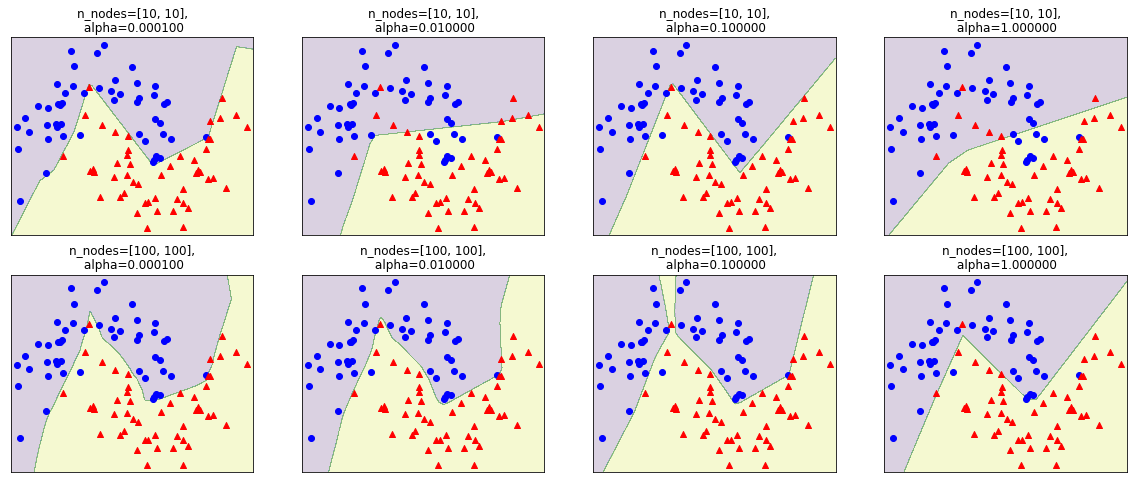

In [10]:
fig,axes = plt.subplots(2,4, figsize=(20,8))
train_scores = []
test_scores = []

for axx, n_hnodes in zip( axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        print(f'*** nodes: {n_hnodes}, alpha: {alpha} ***')
        model = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hnodes,n_hnodes],         # 2 hidden layers, each has 10 or 100 nodes
                            alpha=alpha,                                    # higher alpha, greater regularization (L2 Ridge), more reduction on overfitting
                            max_iter=200)
        model.fit(X_train,y_train)
        train_scores.append((n_hnodes, alpha, model.score(X_train, y_train)))
        test_scores.append((n_hnodes, alpha, model.score(X_test, y_test)))
        plot_boundary(model, X, ax)
        ax.scatter(X[y==0,0],X[y==0,1], c='b', marker='o')
        ax.scatter(X[y==1,0],X[y==1,1], c='r', marker='^')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('n_nodes=[%d, %d],\n alpha=%f'%(n_hnodes,n_hnodes,alpha)); 

plt.show()

#   more iterations are needed for 100 nodes with alpha >=0.1. Regularization requires more time for convergence with high amount of nodes

# Evaluation

In [11]:
train_scores        # node, alpha, score

[(10, 0.0001, 1.0),
 (10, 0.01, 0.8266666666666667),
 (10, 0.1, 0.9866666666666667),
 (10, 1, 0.8266666666666667),
 (100, 0.0001, 1.0),
 (100, 0.01, 1.0),
 (100, 0.1, 1.0),
 (100, 1, 0.9466666666666667)]

In [12]:
test_scores         # node, alpha, score

# Best hyperparam in this case is 10 nodes and alpha=0.1 for two hidden layers

[(10, 0.0001, 0.92),
 (10, 0.01, 0.84),
 (10, 0.1, 0.96),
 (10, 1, 0.92),
 (100, 0.0001, 0.92),
 (100, 0.01, 0.92),
 (100, 0.1, 0.92),
 (100, 1, 0.96)]